<a href="https://colab.research.google.com/github/qhowery/COS324_PA1/blob/main/COS324_PA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Assignment 1

In this assignment, you will implement linear regression and gradient descent and visualize the results. We prompt you with questions throughout the assignment, **but you need not answer the conceptual questions in this notebook.** We hope that they will inspire you to think more deeply about the strengths and weaknesses of these algorithms.

## I. Getting Started with Linear Regression (50 pts)

We'll first do a 1-dimensional problem where we're learning a linear relationship between Y and X. This has a simple analytic solution. Then we use the scikit-learn package to do the n-dimensional regression. Finally, we use visualization methods from PA0 to visualize the results as well as the iterations of gradient descent. The assignment has 100 points.


The two regression problems use the [*diabetes* dataset (see Table 1)](https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf). It contains real records of patients with diabetes. Do not worry as:
* These records have been completely anonymized and are 20 years old..
* Patients gave their consent

The dataset contains 442 records of diabetes patients with the following information and measurements per patient: age, sex, body mass index (BMI), average blood pressure, and six blood serum measurements. For each patient, the  *Diabetes Expression Level*  attribute contains a quantitative measure of disease progression one year later. Physicians assigned a number between 25 to 346 to each patient indicating severity of the disease (higher = more severe). 
 
A predictor for the patient's status a year later would be very useful for designing and executing preventative care for the coming year and possibly reversing the course of the disease. An accurate predictor would probably have a strong effect on preventive behavior as well: faced with a choice between death in two years and  eating half a pound of kale every day, many patients may agree to the kale. 

You are required to construct linear predictors, calculate their error on train & test data, and visualize the prediction of your predictors.

In [ ]:
# Import files
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

When encountering a new dataset, a little *exploratory data analysis* is often useful.  A simple first step is to  see how well just **one** attribute predicts diabetes expression. Let's plot the BMI vs diabetes expression and see if it looks vaguely linear to us!

Text(0.5, 1.0, 'Diabetes Expression vs BMI')

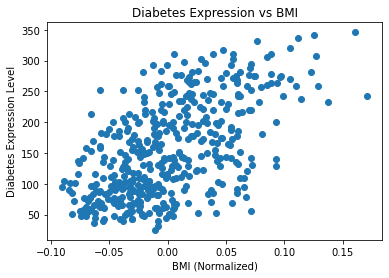

In [ ]:
age_index = 0
sex_index = 1
bmi_index = 2
plt.scatter(diabetes_X[:, bmi_index], diabetes_y)
plt.xlabel('BMI (Normalized)')
plt.ylabel('Diabetes Expression Level')
plt.title('Diabetes Expression vs BMI')

Looks pretty good -- we see some correlation. How about age? 

Text(0.5, 1.0, 'Diabetes Expression vs Age')

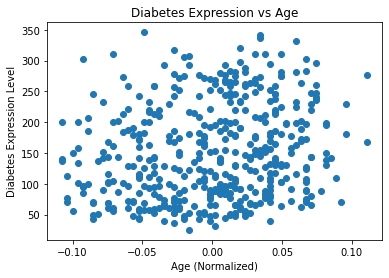

In [ ]:
plt.scatter(diabetes_X[:, age_index], diabetes_y)
plt.xlabel('Age (Normalized)')
plt.ylabel('Diabetes Expression Level')
plt.title('Diabetes Expression vs Age')

Hmm, surprisingly, age isn't very correlated. Seems like diabetes hits people of all ages. This visual check whether attribute & target have a coarse linear relationship is very useful first step for researchers building regression models, and trying to identify relevant variables. Let us proceed with BMI as our sole attribute for now.

As responsible machine learners we would like to prevent overfitting. We will only fit the model using half of our data and holding out the other half for final testing of the model. (Aside: In lecture 2 we mentioned  reserving a fifth of the dataset, which would also be fine in this setting.) 

In [ ]:
# Use only one attribute -- choose between age, sex, or BMI and to form a predictor of diabetes expression level.

X = diabetes_X[:,bmi_index]

# Use a half of the dataset for test
test_size = X.shape[0] // 2

# Split the data into train & test
x_train = X[:-test_size]
x_test = X[-test_size:]

# Split the targets into training/testing sets
y_train = diabetes_y[:-test_size]
y_test = diabetes_y[-test_size:]

### Find a line $\hat{y} = ax + b$ by minimizing $\sum_i (\hat{y}_i - y_i)^2$ (20 pts)

Below when we say "find" we mean that you should use calculus to find the expression, and then write simple code to evaluate it on the dataset. In this simple setting, there's no need to use gradient descent. 

1. Find $b$. (5 pts). **HINT: The data ($x_i$) is normalized**
2. Find $a$ such that $\sum_i (a x_i + b - y_i)^2$ is minimized w.r.t $a$. (5 pts)
3. Calculate the average prediction error (MSE) $\frac1m \sum_{i=1}^m (a x_i + b - y_i)^2$ 
on train and test data. Print the results. (5 pts for predictions, 5 pts for MSE computation)

The mean squared error is a common measurement of error! Food for thought: Why do we square the error? No need to write your answer in the notebook!

In [ ]:
# Your code here!

m = test_size
b = np.mean(y_train)
a = (np.dot(x_train, y_train) - b * np.sum(x_train)) / np.dot(x_train, x_train)

MSE_train = np.sum((a * x_train + b - y_train)**2) / m
MSE_test = np.sum((a * x_test + b - y_test)**2) / m
print(a)
print(b)
print(MSE_train)
print(MSE_test)

912.4363974594336
148.10407239819006
3920.176950951658
3899.4027277113883


Now that we have fit a model and computed its error, it is our job to communicate our work effectively to people who may not know how linear regression works.  Visualizing the data and your model is often a crucial step for debugging and evaluating how well your algorithm works.

### Plot the results (10 pts)
1. Plot a **scatter plot showing $\hat{y}$ vs $y$** taking $y$ along the x-axis and $\hat{y}$ along the y-axis for the training set (in blue color) and for the testing set (in red). 
2. Plot the **line** $\hat{y} = y$ in black in the same graph. This line indicates where all the points would fall if your predictor was exactly correct, so it provides a good visual reference.

Text(0.5, 1.0, 'Predicted Values Compared to Observed Values')

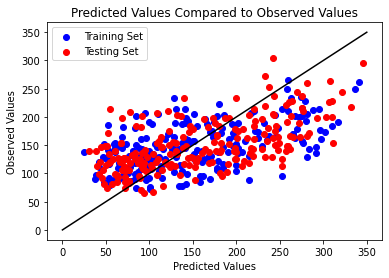

In [ ]:
# Your code here!
y_train_pred = a * x_train + b
y_test_pred = a * x_test + b

plt.scatter(y_train, y_train_pred, c='b')
plt.scatter(y_test, y_test_pred, c='r')
plt.legend(['Training Set', 'Testing Set'])

x = np.linspace(0, 350, 350)
y = x
plt.plot(x, y, c='k')

plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.title('Predicted Values Compared to Observed Values')

Now that we have a sense for how good of a predictor BMI is for diabetes expression, we can try to use all of the features available to us to build a better model and see how much better  we do at prediction using all features.

To keep things simple in this assignment, you will use scikit's off-the-shelf solution. (In  next assignment you will implement gradient descent yourself.) 

### Run regression on all dimensions of the data (20 pts)
Instead of looking at just on  feature from the input, use all 10 of them:

1. Use the [LinearRegression object from scikit.linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to fit the data. (5 pts)
2. Train the model on *all* features from diabetes_X. Use half of the dataset for training and half for testing. (5 pts)
3. Calculate the MSE of the fit on the train and test data. Print the results. (5 pts)
4. Create the same plot as you did above. (5 pts)

2863.2436882241127
2944.3078502481367


Text(0.5, 1.0, 'Predicted Values Compared to Observed Values')

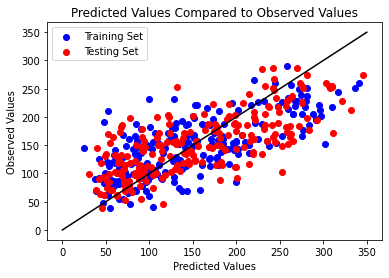

In [ ]:
# Your code here!
train_x = diabetes_X[:-test_size]
test_x = diabetes_X[-test_size:]
train_y = diabetes_y[:-test_size]
test_y = diabetes_y[-test_size:]

model = linear_model.LinearRegression().fit(train_x, y_train)

train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

train_MSE = mean_squared_error(train_pred, train_y)
test_MSE = mean_squared_error(test_pred, test_y)

print(train_MSE)
print(test_MSE)

plt.scatter(y_train, train_pred, c='b')
plt.scatter(y_test, test_pred, c='r')
plt.legend(['Training Set', 'Testing Set'])

x = np.linspace(0, 350, 350)
y = x
plt.plot(x, y, c='k')

plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.title('Predicted Values Compared to Observed Values')


## II. Gradient Descent (50 pts)

Next, we are going to use gradient descent on a function of two variables, and visualize it. We will take you through the exercise step by step. Nonetheless, please read all the code we provide and understand it.
 
In order to run machine learning algorithms efficiently we will be using the numpy library which you have learned about. We are first going to slightly re-define the funky function of PA0 (this is to allow us to drive home the important property that initialization matters). 

In [ ]:
import numpy as np

# returns funkier function over a reasonable range of X, Y values to plot
def funkier(delta=0.01):
    delta = 0.01
    x = np.arange(-3.3, 3.3, delta)
    y = np.arange(-2.8, 2.8, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = np.exp(-X**2 - Y**2) # centered at (0,0)
    Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2) # centered at (1,1)
    Z3 = np.exp(-(X + 1)**2 - (Y + 1)**2) # centered at (-1,-1)
    Z = Z1 - Z2 - 0.7*Z3
    return X, Y, Z

# given X and Y, returns Z
# X and Y can be arrays or single values...numpy will handle it!
def funkier_z(X, Y):
    Z1 = np.exp(-X**2 - Y**2)
    Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
    Z3 = np.exp(-(X + 1)**2 - (Y + 1)**2)
    Z = Z1 - Z2 - 0.7*Z3
    return Z

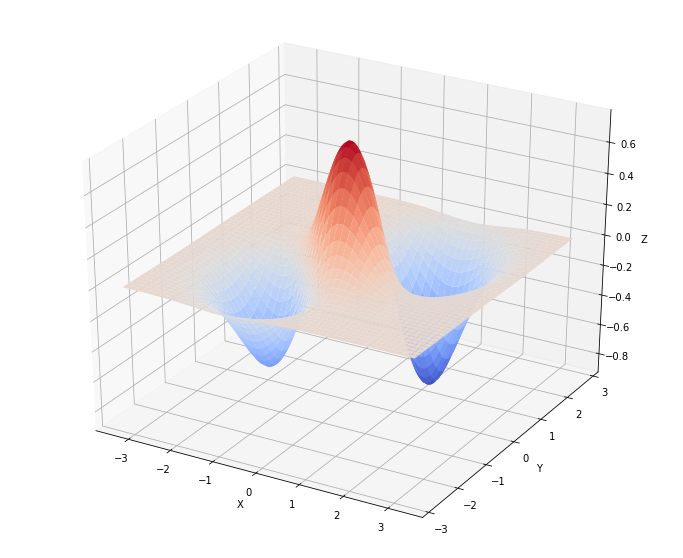

In [ ]:
X, Y, Z = funkier()

# Setting the figure size and 3D projection
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')

# Creating labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
_ = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

This function has a clear maximum and at least two minima, so it's a great place for us to practice gradient descent! Take a guess at how the trajectory should go if we start at the red peak, and keep that visualization in mind as you go forward. It also appears that one of the minima is smaller than the other (i.e., there is a global and local minimum). We will explore the conditions under which you might end up at one over the other.

First,  you have to implement the gradient function. For a particular $x$ and $y$, you will need to compute $\frac{\partial \text{funkier}}{\partial x}$ and $\frac{\partial \text{funkier}}{\partial y}$. `funkier_grad` should return the gradient in tuple form (i.e., should return 2 values). (20 pts)

In [ ]:
def funkier_grad(x,y):
    # your code here! you should return two values
    dx1 = np.exp(-x**2 - y**2) * (-2*x) 
    dx2 = np.exp(-(x - 1)**2 - (y - 1)**2) * (-2*(x - 1)) 
    dx3 = np.exp(-(x + 1)**2 - (y + 1)**2) * (-2*(x + 1)) 
    dx = dx1 - dx2 - 0.7*dx3

    dy1 = np.exp(-x**2 - y**2) * (-2*y)
    dy2 = np.exp(-(x - 1)**2 - (y - 1)**2) * (-2*(y - 1)) 
    dy3 = np.exp(-(x + 1)**2 - (y + 1)**2) * (-2*(y + 1)) 
    dy = dy1 - dy2 - 0.7*dy3

    return (dx, dy)

We next implement gradient descent in order to find the minmum of **funkier**. We wrote most of the code for you. You only need to call your gradient function and implement the gradient step. You need to study the entire function though and add a comment before each line that is not a **print** or **return** command. (20 pts)

In [ ]:
def funkier_minimize(x0, y0, eta):
    # both x and y are arrays of number of steps
    x = np.zeros(len(eta) + 1)
    y = np.zeros(len(eta) + 1)

    # the starting point as defined by function arguments
    x[0] = x0
    y[0] = y0

    print('\n Using starting point: ', x[0], y[0])
    for i in range(len(eta)):
        # if i is divisible by 5, then print an update of position
        if i % 5 == 0:
            print('{0:2d}: x={1:6.3f} y={2:6.3f} z={3:6.3f}'.format(i, x[i], y[i], funkier_z(x[i], y[i])))
        ### Your code here ###
        # calculate partial derivative
        dl = funkier_grad(x[i], y[i])
        # update next position using gradient descent
        x[i + 1] = x[i] - eta[i] * dl[0]
        y[i + 1] = x[i] - eta[i] * dl[1]
        # if update was very small, return
        if (abs(x[i+1] - x[i]) < 1e-6):
            return x[:i+2], y[:i+2]
        # if update was very large, issue a warning for divergence
        if abs(x[i+1]) > 100:
            print('Oh no, diverging?')
            return x[:i+2], y[:i+2]
    return x, y

We will now set for you the maximum number of iterations and the step size.

In [ ]:
max_iter = 30
eta = 0.1 * np.ones(max_iter)

We provide a function to plot the trajectory of gradient descent. It will plot the trajectory on the 3D plot in the style we generated above.

In [ ]:
def plot_3D(xs, ys, zs):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    elev=ax.elev
    azim=ax.azim
    ax.view_init(elev= elev, azim = azim)
    _ = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.5)
    ax.plot(xs, ys, zs, color='orange', markerfacecolor='black', markeredgecolor='k', marker='o', markersize=5)

Finally, it is time to unleash gradient descent and look for the optimum of **funkier**. Please do so, examine the results, and provide a short explanation at the end. Note that we provide you with two different initializations. When you plot the trajectory gradient descent takes, you should see that even though both initializations are very close to each other, they find different minima!

Note that **funkier_minimize** only gives you the $(x,y)$ trajectory. To get the corresponding $z$ values along the trajectory, you will have to call **funkier_z**, defined previously. Here, we demonstrate another powerful feature of numpy. You can pass in single scalars to **funkier_z**, as we did in the **funkier_minimize** function, or you can pass in entire arrays. If you give the function arrays of $x$ and $y$ values, then it will compute the function for each pair of corresponding $(x,y)$ values and return an array of $z$ values. 


 Using starting point:  0.05 0.05
 0: x= 0.050 y= 0.050 z= 0.753
 5: x= 0.286 y= 0.286 z= 0.464
10: x= 0.820 y= 0.820 z=-0.678
15: x= 1.043 y= 1.043 z=-0.883
20: x= 1.087 y= 1.087 z=-0.891
25: x= 1.097 y= 1.097 z=-0.891


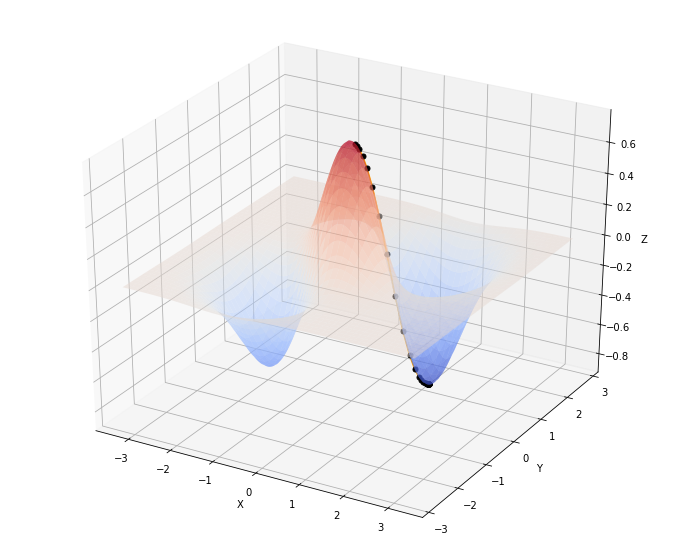

In [ ]:
x_opt, y_opt = funkier_minimize(0.05, 0.05, eta)
# the power of numpy!
z_opt = funkier_z(x_opt, y_opt)
plot_3D(x_opt, y_opt, z_opt)

Now you try it on your own, starting at $(x,y) = (-0.05, -0.05)$ and using the same `eta`. Run gradient descent and plot the results below. (10 pts)


 Using starting point:  -0.05 -0.05
 0: x=-0.050 y=-0.050 z= 0.770
 5: x=-0.133 y=-0.133 z= 0.733
10: x=-0.430 y=-0.430 z= 0.309
15: x=-0.874 y=-0.874 z=-0.462
20: x=-1.051 y=-1.051 z=-0.587
25: x=-1.104 y=-1.104 z=-0.598


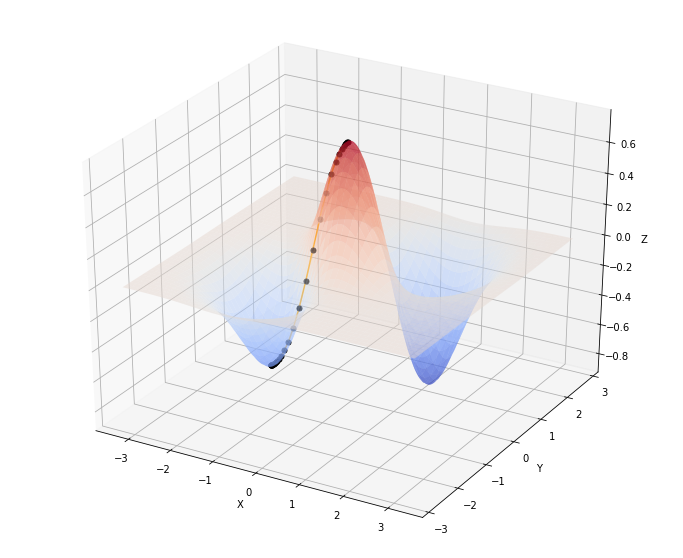

In [ ]:
# your code here!
x_opt, y_opt = funkier_minimize(-0.05, -0.05, eta)
z_opt = funkier_z(x_opt, y_opt)
plot_3D(x_opt, y_opt, z_opt)

# Extra credit: Optimizer visualization tool
**Max +2 points extra credit:** We expect this to take ~1 hour.

***NOTE: We will not be able to resolve queries/help with this Section in office hours***. Do not attempt this until after you've completed the rest of the assignment.

Download the Gradient Descent Visualization tool ([link](https://github.com/lilipads/gradient_descent_viz/#building)). Make sure to follow the instructions for opening the tool. If you have trouble opening it on your device, you can use Princeton Virtual Desktop ([instructions](https://princeton.service-now.com/service?id=kb_article&sys_id=KB0013394#section1)).

Open the tool, choose the "Plateau" surface (first dropdown menu), and deselect Adagrad and RMSProp (leave Gradient descent, Momentum, and Adam checked).

Answer the following questions each with **1 sentence**.

## E1: Convergence speed
Keeping the default options (GD learning rate = 1e-3; momentum learning rate = 1e-3, beta = 0.8; Adam learning rate = 1e-3, Beta1 = 0.9; Beta2 = 0.999) run the visualization tool. Describe the convergence speed among the 3 methods (e.g. which converged the fastest? slowest? middle?)

Note that the "Plateau" surface has a global minimum in the center that's surrounded by a hilly ring, creating a local minimum ring outside of the hilly ring.

**Answer:**

## E2: Finetuning Adam optimizer

**A)** Keeping the betas constant, try decreasing and increasing the learning rate for the Adam optimizer. What's the effect of increasing or decreasing the learning rate of the optimizer?

*Note:* The learning rate of 1e-3 is $10^{-3}$ so decreasing it by a factor of 10 would make it 1e-4 (i.e. $10^{-4}$).

**Answer:**

**B)** Keeping the betas constant, try decreasing and increasing the learning rate and identify a **range of learning rates** for which Adam converges at the global minimum.

**Answer:**



## E3: Finetuning Momentum optimizer (i.e. gradient descent with momentum)

**A)** Keeping the learning rate constant, try setting the decay rate = 1 as well as decay rate = 0 (and values in between) for the momentum optimizer (Note: the decay rate in the visualizer is $\beta$ in the formula from lec 3). What's the effect of the decay rate (e.g. what happens when the decay rate is high, i.e. decay rate = 1; when it's low?)

**Answer:**

**B)** Reset decay rate = 0.8, try decreasing and increasing the learning rate and identify a learning rate for which momentum converges to the global minimum.

**Answer:**

**C)** Set lr = 1e-1 and decay rate = 0.8 for momentum and describe what happens when you run the visualization (you may want to set the playback speed to 1x or 0.2x).

**Answer:**

## E4: Finetuning gradent descent optimizer

Try increasing and decreasing the learning rate for gradient descent to identify one for which gradient descent converges to the global minimum. You'll most likely struggle to identify such a learning rate. 

**A)** Try lr = 1e-1 (set playback speed to 0.2x) and observe its behavior. Explain why it doesn't converge to the global minimum.

**Answer:**

**B)** Try lr = 1e-0 (set playback speed to 0.2x) and observe its behavior. Explain the behavior you observe.

**Answer:**

##E5: Saddlepoint visualization

Change the surface to "Saddle Point" and reset Gradient Descent, Momentum, and Adam to the default values (GD: lr = 1e-3; Momentum: lr = 1e-3, decay rate = 0.8; Adam: lr = 1e-3, Beta1 = 0.9, Beta2 = 0.999).


**A)** Run the visualization tool for all 3 methods with the "Path" option checked and describe what you observe about each method's convergence in terms of speed of convergence and direction of path (no need to explain why for now, just what you observe).

**Answer:**

**B)** Re-run the visualization tool several times and experiment with viewing it with each of the following options: Gradient Arrows (i.e. the gradient $\nabla L$), Momentum Arrows (i.e. the vector $\vec{\mathbf{v}}$ from course notes) , Adjusted Gradient Arrows (i.e. the vector subtracted from $\vec{\mathbf{w}}$ in each method's gradient update rule). With these visualizations and what you know about each of the 3 methods, how would you explain the behavior of each method in terms of speed of convergence and direction of path (i.e. the "why" of what you observed, **max 2 sentences**).

**Answer:**